
### Problem Statement 

We try to classify SMS messages as SPAM or HAM using various ML algorithms. 

The Dataset is a set of SMS tagged messages collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

The dataset is available here - https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection


In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#Load the dataset
d = pd.read_csv('spam.csv')

In [3]:
d.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
d.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

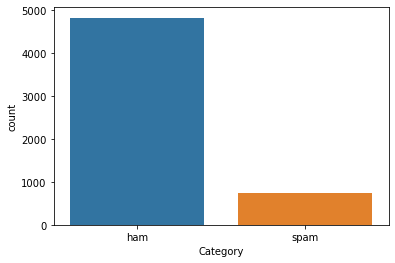

In [5]:
sns.countplot(d['Category'])

In [6]:
d.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
d.dtypes

Category    object
Message     object
dtype: object

In [8]:
d.shape

(5572, 2)

In [9]:
import nltk
from nltk.corpus import stopwords
spam_words = ''
ham_words = ''
for val in d[d['Category'] == 'spam'].Message:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '
        
for val in d[d['Category'] == 'ham'].Message:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

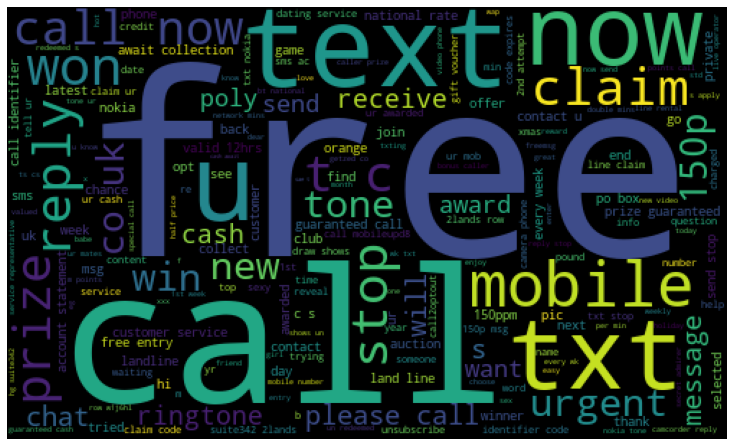

In [10]:
#visualize the words of spam and ham words
from wordcloud import WordCloud
spam_wordcloud = WordCloud(width=500, height=300).generate(spam_words)
ham_wordcloud = WordCloud(width=500, height=300).generate(ham_words)
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

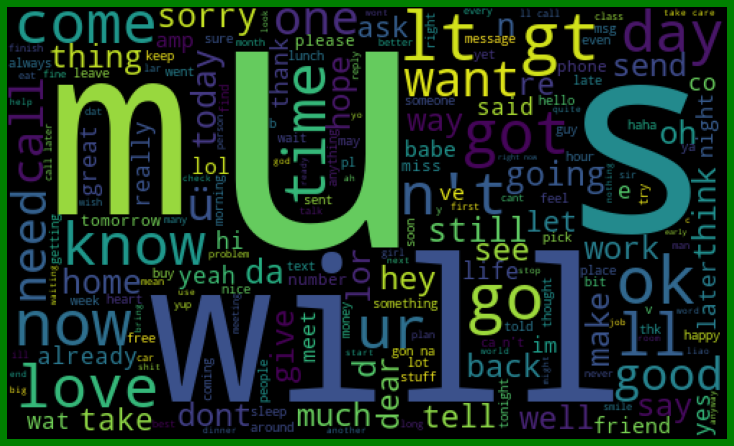

In [11]:
plt.figure( figsize=(10,8), facecolor='g')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [12]:
#Feature variable = Message
#Target variable = Category
import numpy as np
from sklearn.preprocessing import LabelEncoder
X = d.Message

lb = LabelEncoder()
d["target"] = lb.fit_transform(d["Category"])
Y = d.target
#0 - ham,1-spam
d.head()

,Category,Message,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [13]:
print(X.shape)
print(Y.shape)

(5572,)
(5572,)


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
count = CountVectorizer()
x_train_count = count.fit_transform(x_train)
x_test_count = count.transform(x_test)

tfidf = TfidfTransformer()
x_train_tf = tfidf.fit_transform(x_train_count)
x_test_tf = tfidf.transform(x_test_count)

In [16]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_tf,y_train)
pred = model.predict(x_test_tf)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score : ", accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

Accuracy Score :  0.9700956937799043
[[1446    2]
 [  48  176]]


In [18]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1)
model.fit(x_train_tf,y_train)
pred = model.predict(x_test_tf)

print("Accuracy Score : ", accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

Accuracy Score :  0.9766746411483254
[[1448    0]
 [  39  185]]


In [19]:
#SVC
from sklearn import svm
model = svm.SVC(C=1)
model.fit(x_train_tf,y_train)
pred = model.predict(x_test_tf)

print("Accuracy Score : ", accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

Accuracy Score :  0.986244019138756
[[1448    0]
 [  23  201]]


In [20]:
#KNN
#Optimal value 
n = np.arange(30)
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
param_grid = {'n_neighbors' : n}
model = KNeighborsClassifier()
grid = GridSearchCV(model,param_grid)
grid.fit(x_train_tf,y_train)
print(grid.best_params_)

{'n_neighbors': 15}


In [21]:
model = KNeighborsClassifier(n_neighbors = 15)
model.fit(x_train_tf,y_train)
pred = model.predict(x_test_tf)

print("Accuracy Score : ", accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

Accuracy Score :  0.9700956937799043
[[1448    0]
 [  50  174]]


In [22]:
#NaiveBayes
from sklearn.naive_bayes import MultinomialNB
model =MultinomialNB()
model.fit(x_train_tf,y_train)
pred = model.predict(x_test_tf)

print("Accuracy Score : ", accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

Accuracy Score :  0.9617224880382775
[[1448    0]
 [  64  160]]


In [23]:
result_score = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest','SVC','KNN','Naive',],
    'Score' : [0.9700,0.9766,0.9862,0.9700,0.9617]})
result_score.head()

,Model,Score
0,Logistic Regression,0.9700
1,Random Forest,0.9766
2,SVC,0.9862
3,KNN,0.9700
4,Naive,0.9617


In [24]:
#let's build the model using SVC
from sklearn import svm
model = svm.SVC(C = 20, gamma =  0.1, kernel = 'sigmoid')
model.fit(x_train_tf,y_train)
pred = model.predict(x_test_tf)

print("Accuracy Score : ", accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

Accuracy Score :  0.9922248803827751
[[1445    3]
 [  10  214]]


In [25]:
#Use an example
words = ["Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed £1000 cash or £5000 prize!","Mom, Please call me back","You’ve won a prize! Go to [link] to claim your $500 Amazon gift card.","URGENT Your grandson was arrested last night in Mexico. Need bail money immediately Western Union Wire $9,500: press this link","Hey man, call me once you reach home"]
x_count = count.transform(words)
x_td = tfidf.transform(x_count)
prediction = model.predict(x_td)

In [26]:
category1 = ['ham','spam']
print("The output of the following ")
for i,category in zip(words,prediction):
    print(i)
    print("---------------------------------")
    print("Prediction category : ", category1[category])
    print("\n")

The output of the following 
Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed £1000 cash or £5000 prize!
---------------------------------
Prediction category :  spam


Mom, Please call me back
---------------------------------
Prediction category :  ham


You’ve won a prize! Go to [link] to claim your $500 Amazon gift card.
---------------------------------
Prediction category :  spam


URGENT Your grandson was arrested last night in Mexico. Need bail money immediately Western Union Wire $9,500: press this link
---------------------------------
Prediction category :  spam


Hey man, call me once you reach home
---------------------------------
Prediction category :  ham


